## Rain Prediction in Australia
We implement a predictive model on Rain Dataset to predict whether or not it will rain tomorrow in Australia.<br>
The Dataset contains about 10 years of daily weather observations of different locations in Australia.<br>
This independant projects is part of learning curve for predictive modeling.

#### Major Steps -
1. Problem Statement
2. Data Gathering
3. Importing Necessary Libraries
4. Data Preprocessing
5. Finding categorical and numerical features in Dataset
6. Cardinality check for categorical features
7. Handling Missing values
8. Outlier Detection and Treatment
9. Exploratory Data Analysis
10. Encoding Categorical features
11. Correlation
12. Feature importance
13. Splitting Data into Training and Testing sets
14. Feature Scaling
15. Model Building and Evaluation
16. Results and Conclusion
17. Model Saving and Scaling object using Pickle

### Problem Statement
Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow in Australia.

### Dataset Description
Number of columns: 23
<br>
Number of rows: 145460
<br>
Number of Independent Columns: 22
<br>
Number of Dependent Column: 1

### Importing Libraries
The first step in any Data Analysis step is importing necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading Dataset


In [4]:
location = 'C:/Users/Princy/Downloads/weatherAUS.csv'

In [5]:
rain = pd.read_csv(location)

In [6]:
rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
#checking shape
rain.shape

(145460, 23)

### Data Preprocessing
Real-world data is often messy, incomplete, unstructured, inconsistent, redundant, sprinkled with wacky values. So, without deploying any Data Preprocessing techniques, it is almost impossible to gain insights from raw data.

In [8]:
#dataset summary
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

1. Dataset has two data types: float64, object
2. Except for the Date, Location columns, every column has missing values.

In [10]:
#Descriptive Statistics
rain.describe(exclude = [object])

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [11]:
rain.describe(include = [object])

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-10-27,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


### Finding Categorical and Numerical Features in a Data set

In [14]:
#Categorical features
categorical_features = [column_name for column_name in rain.columns if rain[column_name].dtype == 'O']
print('Number of categorical features: {}'.format(len(categorical_features)))
print('Categorical features: {}'.format(list(categorical_features)))

Number of categorical features: 7
Categorical features: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [15]:
#Numerical Features
numerical_features = [column_name for column_name in rain.columns if rain[column_name].dtype != 'O']
print('Number of numerical features: {}'.format(len(numerical_features)))
print('Numerical Features:', list(numerical_features))

Number of numerical features: 16
Numerical Features: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


### Cardinality Check for Categorical Features
1. The accuracy, performance of a classifier not only depends on the model that we use, but also depends on how we preprocess data, and what kind of data you’re feeding to the classifier to learn.
2. Many Machine learning algorithms like Linear Regression, Logistic Regression, k-nearest neighbors, etc. can handle only numerical data, so encoding categorical data to numeric becomes a necessary step.  But before jumping into encoding, check the cardinality of each categorical feature.
3. Cardinality: The number of unique values in each categorical feature is known as cardinality.
4. A feature with a high number of distinct/ unique values is a high cardinality feature. A categorical feature with hundreds of zip codes is the best example of a high cardinality feature.
5. This high cardinality feature poses many serious problems like it will increase the number of dimensions of data when that feature is encoded. This is not good for the model.
6. There are many ways to handle high cardinality, one would be feature engineering and the other is simply dropping that feature if it doesn’t add any value to the model.

In [18]:
for each_feature in categorical_features:
    unique_values = len(rain[each_feature].unique())
    print('Cardinality of {} is {}'.format(each_feature, unique_values))

Cardinality of Date is 3436
Cardinality of Location is 49
Cardinality of WindGustDir is 17
Cardinality of WindDir9am is 17
Cardinality of WindDir3pm is 17
Cardinality of RainToday is 3
Cardinality of RainTomorrow is 3


**Date** column has high cardinality which poses several problems to the model in terms of efficiency and also dimensions of data increase when encoded to numerical data.

In [19]:
#feature engineering for reducing high cardinality for 'Date' column
rain['Date'] = pd.to_datetime(rain['Date'])
rain['year'] = rain['Date'].dt.year
rain['month'] = rain['Date'].dt.month
rain['day'] = rain['Date'].dt.day

In [20]:
rain.drop('Date', axis = 1, inplace = True)
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


### Handling Missing Values
If a dataset contains missing values and loaded using pandas, then missing values get replaced with NaN(Not a Number) values. These NaN values can be identified using methods like isna() or isnull() and they can be imputed using fillna(). This process is known as Missing Data Imputation.If a dataset contains missing values and loaded using pandas, then missing values get replaced with NaN(Not a Number) values. These NaN values can be identified using methods like isna() or isnull() and they can be imputed using fillna(). This process is known as **Missing Data Imputation**.

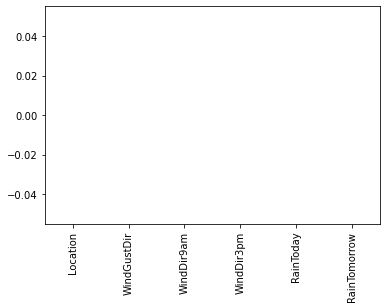

In [39]:
categorical_features = [column_name for column_name in rain.columns if rain[column_name].dtype == 'O']
rain[categorical_features].isnull().sum()

In [31]:
#imputing missing values with mode
categorical_features_with_null = [feature for feature in categorical_features if rain[feature].isnull().sum()]
for each_feature in categorical_features_with_null:
    mode_val = rain[each_feature].mode()[0]
    rain[each_feature].fillna(mode_val, inplace = True)

In [38]:
#Handling missing values with numerical features
numerical_features = [column_name for column_name in rain.columns if rain[column_name].dtype != 'O']
rain[numerical_features].isnull().sum()


MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
year             0
month            0
day              0
dtype: int64

Missing values in Numerical Features can be imputed using Mean and Median. Mean is sensitive to outliers and median is immune to outliers. If you want to impute the missing values with mean values, then outliers in numerical features need to be addressed properly.

In [34]:
#Outlier Treatment
features_with_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']
for feature in features_with_outliers:
    q1 = rain[feature].quantile(.25)
    q3 = rain[feature].quantile(.75)
    IQR = q3 - q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    rain.loc[rain[feature] < lower_limit, feature] = lower_limit
    rain.loc[rain[feature] > upper_limit, feature] = upper_limit

In [35]:
#imputing missing values using mean
numerical_features_with_null = [feature for feature in numerical_features if rain[feature].isnull().sum()]
for feature in numerical_features_with_null:
    mean_value = rain[feature].mean()
    rain[feature].fillna(mean_value, inplace = True)

### Exploratory Data Analysis


#### Univariate Analysis

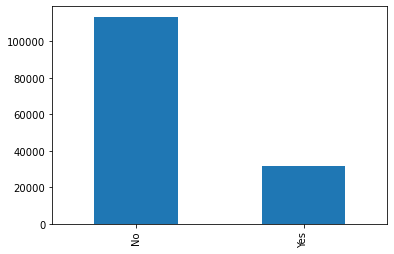

In [36]:
rain['RainTomorrow'].value_counts().plot(kind = 'bar')

The Target variable is imbalanced. It has more ‘No’ values. If data is imbalanced, then it might decrease the model preformance. As this data is released by the meteorological department of Australia, it doesn’t make any sense when we try to balance the target variable, because the truthfulness of data might decrease. So, let it be as it is.

#### Bi-variate Analysis

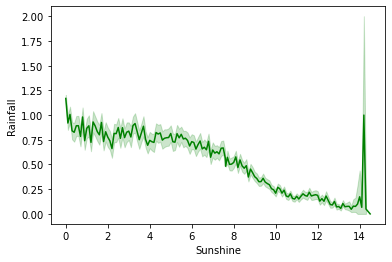

In [40]:
#Sunshine vs. Rainfall
sns.lineplot(data = rain, x = 'Sunshine', y= 'Rainfall', color = 'green')

The **Sunshine** feature is inversely proportional to the **Rainfall** feature.

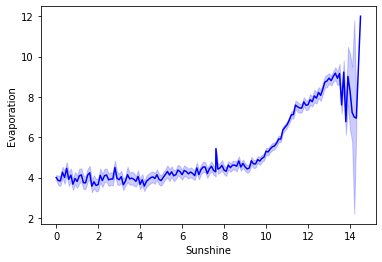

In [41]:
#Sunshine vs Evaporation
sns.lineplot(data = rain, x = 'Sunshine', y = 'Evaporation', color = 'blue')

The Sunshine feature is proportional to the Evaporation feature.

### Encoding of Categorical features


In [42]:
def encode_data(feature_name):
    ''' 

    This function takes feature name as a parameter and returns mapping dictionary to replace(or map) categorical data with numerical data.

    '''
    mapping_dict = {}
    unique_values = list(rain[feature_name].unique())
    
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
    return mapping_dict

rain['RainToday'].replace({'No': 0, 'Yes': 1}, inplace = True)
rain['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace = True)
rain['WindGustDir'].replace(encode_data('WindGustDir'), inplace = True)
rain['WindDir9am'].replace(encode_data('WindDir9am'), inplace = True)
rain['WindDir3pm'].replace(encode_data('WindDir3pm'), inplace = True)
rain['Location'].replace(encode_data('Location'), inplace = True)

In [43]:
rain.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,0,13.4,22.9,0.6,5.318667,7.611178,0,44.0,0,0,...,1007.1,8.000000,4.50993,16.9,21.8,0,0,2008,12,1
1,0,7.4,25.1,0.0,5.318667,7.611178,1,44.0,1,1,...,1007.8,4.447461,4.50993,17.2,24.3,0,0,2008,12,2
2,0,12.9,25.7,0.0,5.318667,7.611178,2,46.0,0,1,...,1008.7,4.447461,2.00000,21.0,23.2,0,0,2008,12,3
3,0,9.2,28.0,0.0,5.318667,7.611178,3,24.0,2,2,...,1012.8,4.447461,4.50993,18.1,26.5,0,0,2008,12,4
4,0,17.5,32.3,1.0,5.318667,7.611178,0,41.0,3,3,...,1006.0,7.000000,8.00000,17.8,29.7,0,0,2008,12,5


### Correlation

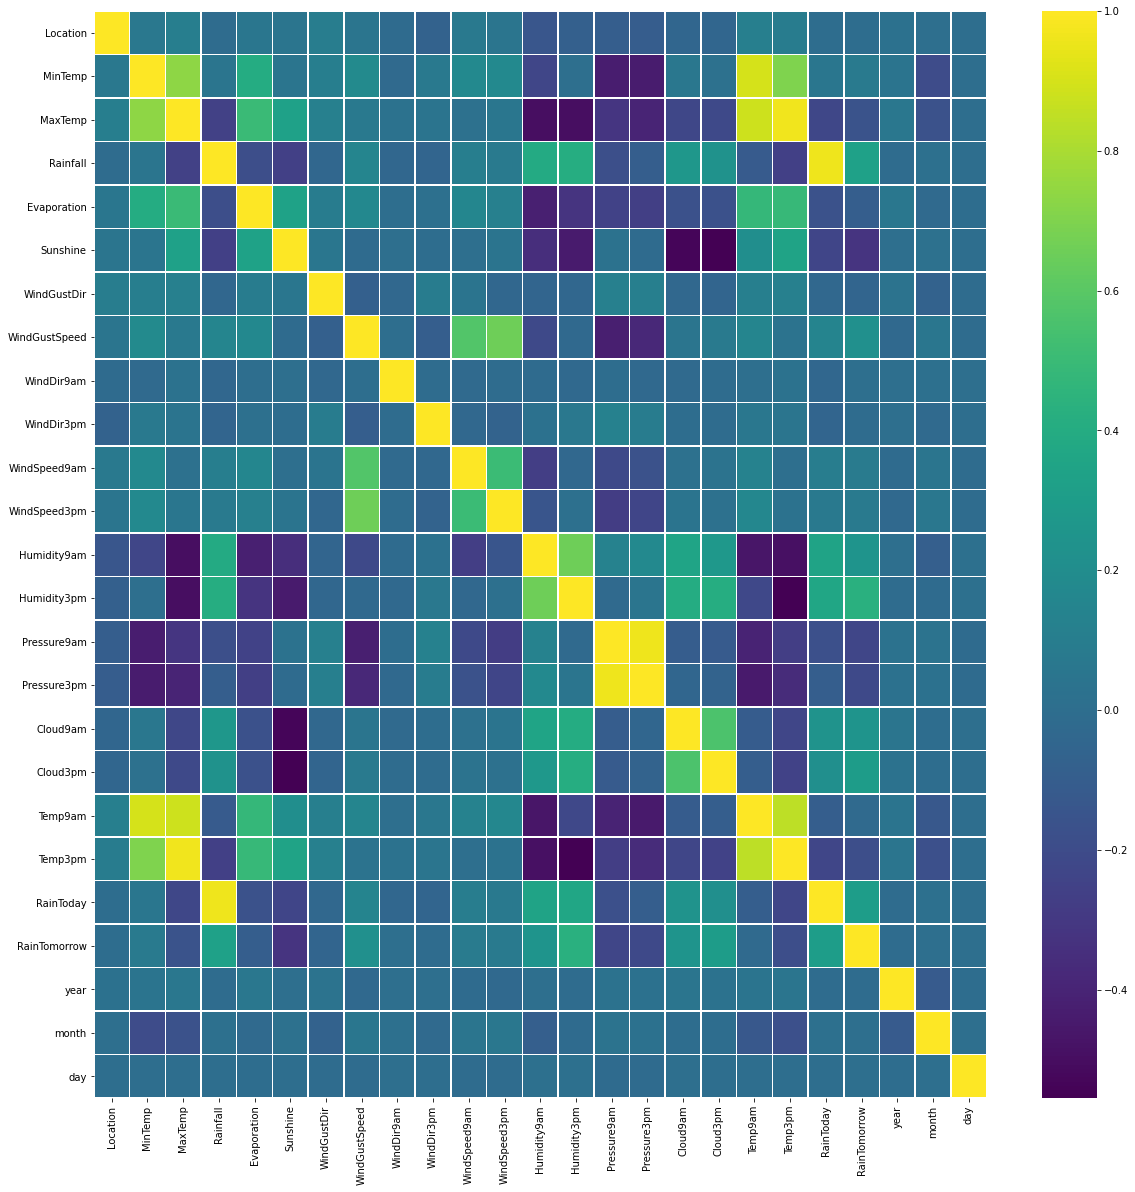

In [44]:
plt.figure(figsize = (20, 20))
sns.heatmap(rain.corr(), linewidth = 0.5, annot = False, fmt = ".2f", cmap = 'viridis')

#### Splitting Predictor Variables and Target Variable

In [45]:
X = rain.drop(['RainTomorrow'], axis = 1)
y = rain['RainTomorrow']

### Feature Importance

We will be using ExtraTreesRegressor class for Feature Importance. This class implements a meta estimator that fits a number of randomized decision trees on various samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [46]:
from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(X, y)
etr_model.feature_importances_

array([0.03461417, 0.03006748, 0.02877866, 0.04223193, 0.02328055,
       0.04305731, 0.03000521, 0.0562639 , 0.03051926, 0.03158519,
       0.0310119 , 0.03241385, 0.03626931, 0.20171297, 0.03523775,
       0.05095388, 0.02456098, 0.03577683, 0.02787595, 0.02866812,
       0.05125583, 0.0309123 , 0.0305194 , 0.03242727])

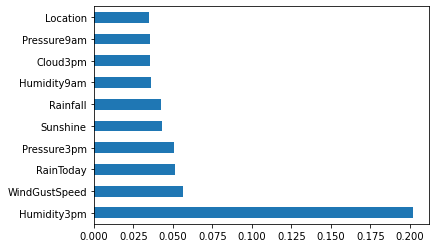

In [47]:
feature_imp = pd.Series(etr_model.feature_importances_, index = X.columns)
feature_imp.nlargest(10).plot(kind = 'barh')

### Splitting Data into Training and Testing Set

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [49]:
print("Training Data Length: {}".format(len(X_train)))
print("Testing Data Length: {}".format(len(X_test)))

Training Data Length: 116368
Testing Data Length: 29092


### Feature Scaling


In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Model Building
 I will be using a Logistic Regression algorithm to build a predictive model to predict whether or not it will rain tomorrow in Australia.

1. Logistic Regression: It is a statistic-based algorithm used in classification problems. It allows us to predict the probability of an input belongs to a certain category.
2. It uses the logit function or sigmoid function as a core.
3. According to the Data science community, logistic regression can solve 60% of existing classification problems.

<img src="https://editor.analyticsvidhya.com/uploads/53675logit%20function.png"/>

In [52]:
#Model Training
from sklearn.linear_model import LogisticRegression
classifier_logreg = LogisticRegression(solver = 'liblinear', random_state = 0)
classifier_logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [53]:
#Model Testing
y_pred = classifier_logreg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
#Evaluating Model Performance
from sklearn.metrics import accuracy_score
print('Accuracy Score: {}'.format(accuracy_score(y_test, y_pred)))

Accuracy Score: 0.8444933315000688


In [56]:
#Checking Overfitting and underfitting
print('Train Data Score: {}'.format(classifier_logreg.score(X_train, y_train)))
print('Test Data Score: {}'.format(classifier_logreg.score(X_test, y_test)))

Train Data Score: 0.8437714835693662
Test Data Score: 0.8444933315000688


The accuracy Score of training and testing data is comparable and almost equal.<br>
So, there is no question of underfitting and overfitting. Also, the model is generalizing well for new unseen data.

In [58]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[21536  1190]
 [ 3334  3032]]


In [75]:
y.value_counts()

0    113583
1     31877
Name: RainTomorrow, dtype: int64

In [69]:
from sklearn.metrics import classification_report
target_names = ['No', 'Yes']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

          No       0.87      0.95      0.90     22726
         Yes       0.72      0.48      0.57      6366

    accuracy                           0.84     29092
   macro avg       0.79      0.71      0.74     29092
weighted avg       0.83      0.84      0.83     29092



#### ROC(Receiver Operating Characteristic) Curve
1. The ROC curve is an evaluation metric used in binary classification problems to know the performance of the classifier.
2. It is a curve plotted between True Positive Rate(TPR) and False Positive Rate(FPR) at various thresholds.
3. ROC graph summarizes all the confusion matrices produced at different threshold values.
4. ROC curve is used to determine which threshold value is best for Logistic Regression in order to classify classes.

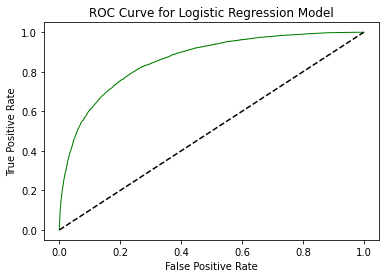

In [76]:
y_pred_logreg_proba = classifier_logreg.predict_proba(X_test)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg_proba[:,1])
plt.figure(figsize = (6, 4))
plt.plot(fpr, tpr, '-g', linewidth = 1)
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve for Logistic Regression Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [79]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier_logreg, X_train, y_train, cv = 5, scoring = 'accuracy')
print('Cross-validation scores: {}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

Cross-validation scores: [0.84338747 0.84235628 0.84691072 0.84067374 0.84359558]
Average cross-validation score: 0.8433847578355673


### Results and Conclusion
1. The logistic Regression model accuracy score is 0.84. The model does a very good job of predicting.
2. The model shows no sign of Underfitting or Overfitting. This means the model generalizing well for unseen data.
3. The mean accuracy score of cross-validation is almost the same as the original model accuracy score. So, the accuracy of the model may not be improved using Cross-validation.
 

### Saving Model and Scaling object with Pickle


In [80]:
import pickle
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [81]:
with open('logreg.pkl', 'wb') as file:
    pickle.dump(classifier_logreg, file)